In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 


def create_cycle(num):
    network = nx.Graph() 
    nodes = range(num)
    network.add_nodes_from(nodes) 
    nx.add_cycle(network, nx.nodes(network))
    
    return nx.Graph(network)

[0, 2, 4, 0, 2, 4, 1, 3]


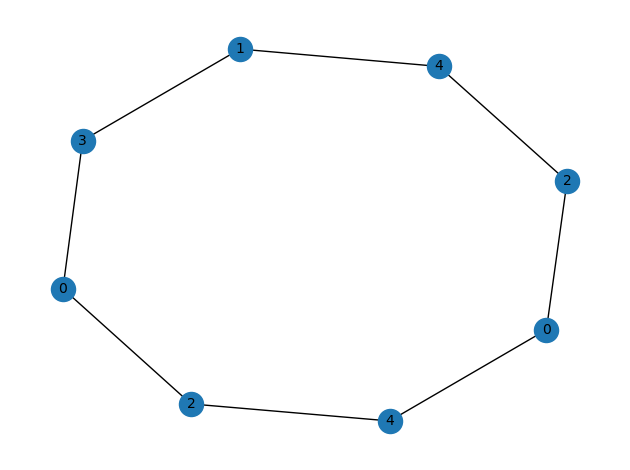

In [2]:
possible_color = [0, 1, 2, 3, 4, 5, 6, 7]
network = create_cycle(8)

label_list = {}
node_list = list(nx.nodes(network))

for i in node_list:
    label_list.update({i : -2})

for i in node_list:
    neighbors_list = list(nx.all_neighbors(network, i))
    bad_list=[]
    for k in neighbors_list:
        bad_list.append(label_list[k])
        bad_list.append(label_list[k]+1)
        bad_list.append(label_list[k]-1)
    for j in neighbors_list:
        secondary_neighbor = list(nx.all_neighbors(network, j))
        for k in secondary_neighbor:
            bad_list.append(label_list[k])
    labels = [x for x in possible_color if x not in bad_list]
    label_list[i]=labels[0]

color_list = list(label_list.values())
print(color_list)
pos = nx.spring_layout(network)
nx.draw_networkx(network,pos,with_labels=False)
  # positions for all nodes
nx.draw_networkx_labels(network, pos, label_list, font_size=10)
plt.tight_layout()
plt.axis("off")
plt.show()